In [1]:
from IPython.display import Image

We looked at a basic API, and we developed a four-step process to query an API.

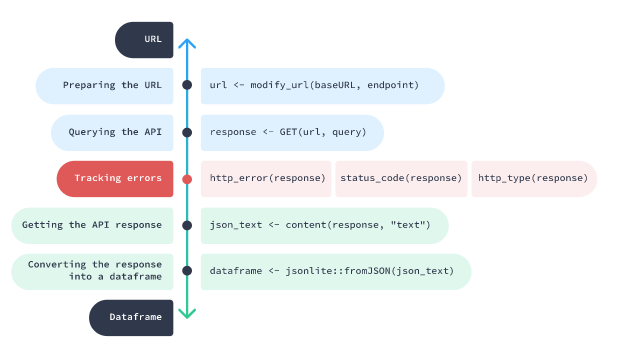

Our example used the [`World Bank`(WB) APIs](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation). WB APIs provide access to several datasets and time series covering multiples topics (**agriculture**, **economy**, **health**, etc.).

We built this function to query these APIs.

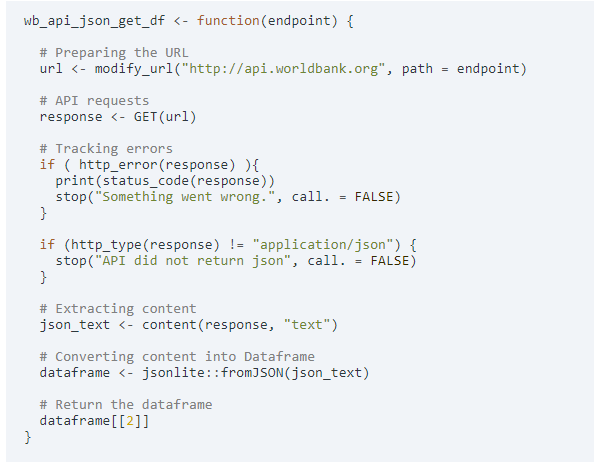

In this file, we'll continue working with this API. We will also discover the [GitHub API](https://docs.github.com/en/free-pro-team@latest/rest), specifically how to query it with [authentication](https://docs.github.com/en/free-pro-team@latest/rest#authentication). Our goal is to develop a greater understanding of APIs.

As a reminder, let's use the `wb_api_json_get_df()` function to query the indicator time series available in the World Bank datasets.

**Task**

1. Use this command to **query the indicators** covered by the World Bank APIs: `wb_api_json_get_df("v2/indicator?format=json")`.
2. **Explore** the `wb_indicator_df` dataframe to see the regions the World Bank APIs cover.

**Answer**

`wb_indicator_df <- wb_api_json_get_df("v2/indicator?format=json")`

Now we'll see how to add new parameters to refine our API requests. In last file, we discovered that one of the most common API requests is the **GET** request. For example, in the `'http://api.worldbank.org/v2/indicator?format=json'` URL, the `format=json` part is a GET request to send data in JSON format.

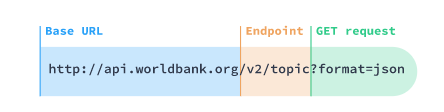

We can often add several other GET requests to the URL. We can find those available in the documentation for each API. To avoid cluttering the URL, in R, we use the **query parameters** to add those requests.

We can use the `query` parameter of the `GET()` function from the `httr` package to add the query parameters to our request.

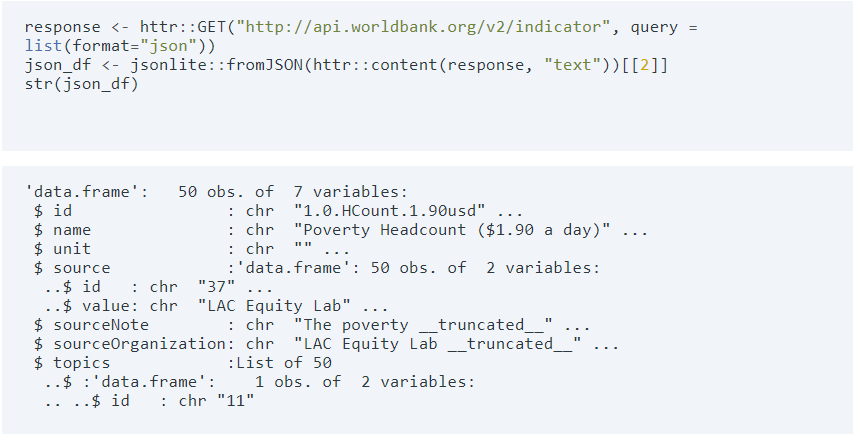

To make our function fully functional, we can add an optional parameter to our `wb_api_json_get_df()` function. We can use this parameter to pass other query parameters to our function if necessary.

**Task**

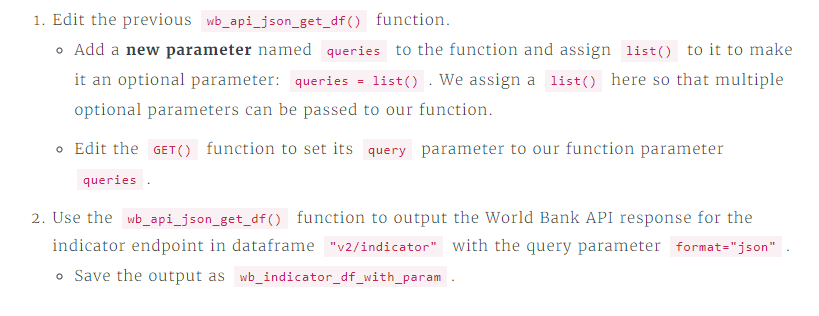

**Answer**

Sometimes, a request can return many objects. This might happen when we're listing out all 17,513 indicators, for example. Returning too much data will take a long time and slow the server down.

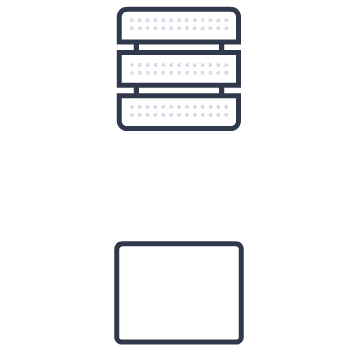

In [2]:
Image("server_down.gif")

This isn't a great user experience, so API providers typically implement **pagination**. This means that the API provider will only return a certain number of records per page. We can specify the page number that we want to access. To access all of the pages, we need to extract each page and then combine them.

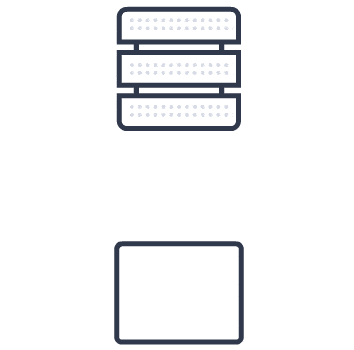

In [3]:
Image("server_returns_one_page.gif")

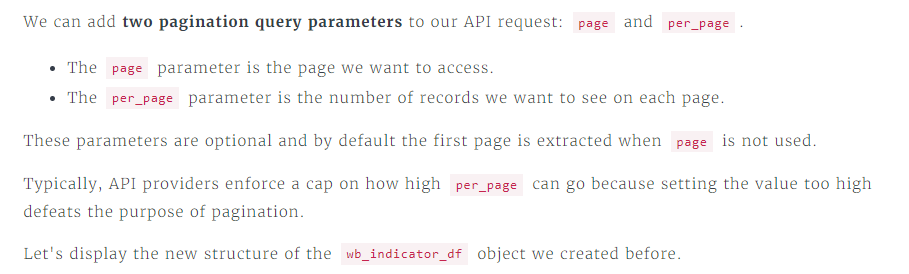

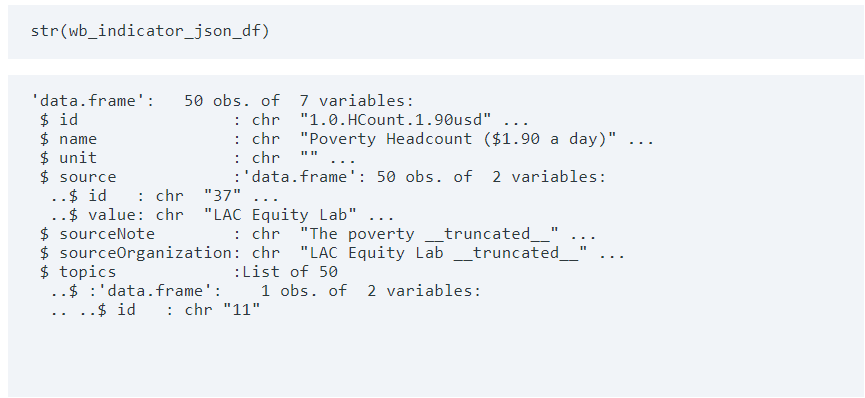

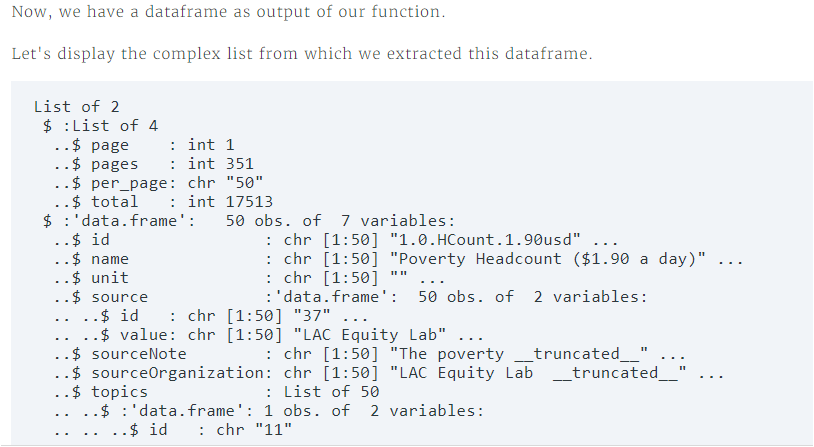

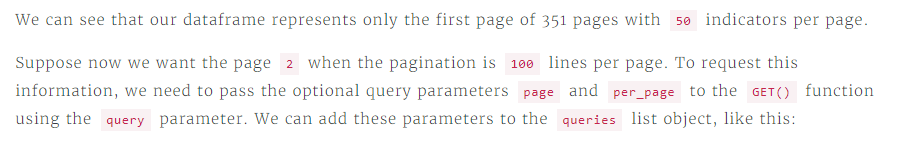

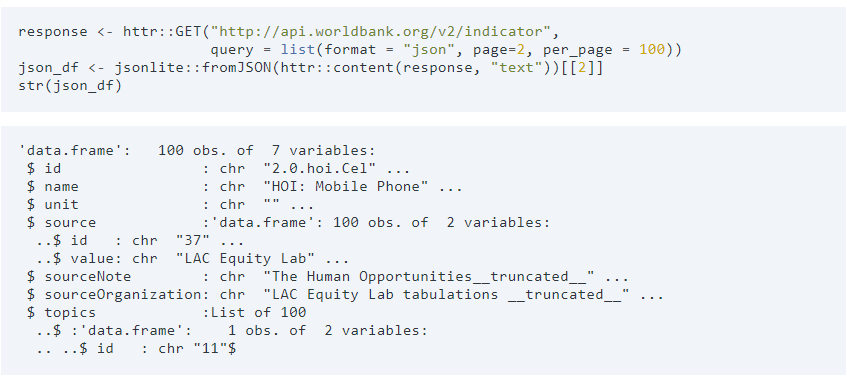

Let's use this technique to query the third page of the indicators when the pagination set 75 lines per page

**Task**

1. Use the `wb_api_json_get_df()` function to output the World Bank API response for the indicator endpoint in dataframe `"v2/indicator"`. We don't need to modify the function for this operation because we can pass these optional query parameters directly to the queries list object we added above. Set the following query parameters:

    * Set the output to JSON format: `format="json"`.
    * Extract the **third page**.
    * Set the number of indicators per page to `75`.
2. Save the output as `wb_indicator_json_df_3`.

**Answer**

`wb_indicator_json_df_3 <- wb_api_json_get_df("v2/indicator", 
                                             queries = list(format="json", page=3, per_page = 75))`

We looked at World Bank APIs in the last file and above. These APIs didn't require authentication, but most do. Imagine that we're using the [Reddit API](https://www.reddit.com/dev/api/) to pull a list of our private messages. It would be a huge privacy breach for Reddit to give that information to anyone, so requiring authentication makes sense.

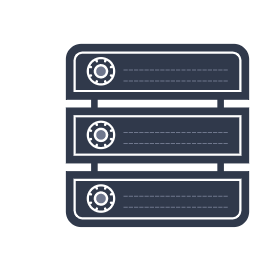

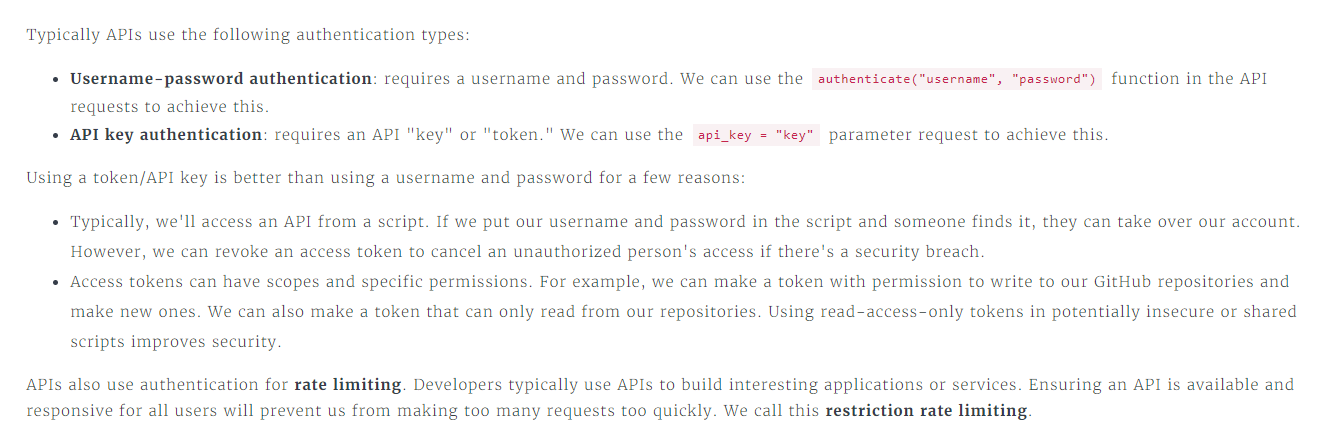

Data Gov API is an API we can use to access and manipulate many datasets about the United States (US) covering several topics.

Take a look at the [documentation for the Data Gov API](https://api.data.gov/docs/), specifically the [United States Agriculture Department dataset](https://www.ers.usda.gov/developer/data-apis/arms-data-api/).

To authenticate with the Data Gov API, we need to use an access token. An access token is a credential we can [generate on the Data Gov's website](https://api.data.gov/signup/). The token is a string that the API can read and associate with our account.

We need to pass our token to the Data Gov API through the query parameter `api_key`, just like we did before for pagination.

`queries = list(api_key = "1f36137fbbe1602f779300dad26e4c1b7fbab631")`

In this case, our access token is `1f36137fbbe1602f779300dad26e4c1b7fbab631`. Data Gov generated this token and associated it with our account.

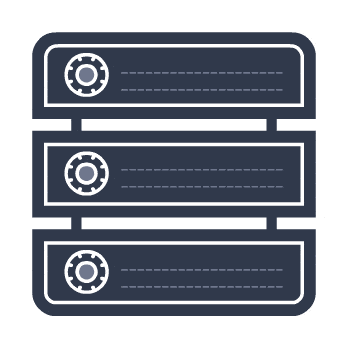

In [4]:
Image("content_revealed.gif")

We should never share our token with anyone we don't want to have access to our account. We've revoked the token we'll use, so it isn't valid anymore. Consider a token equivalent to a password, and store it securely.

We've provided the `gov_api_json()` custom function to access the Data Gov API.

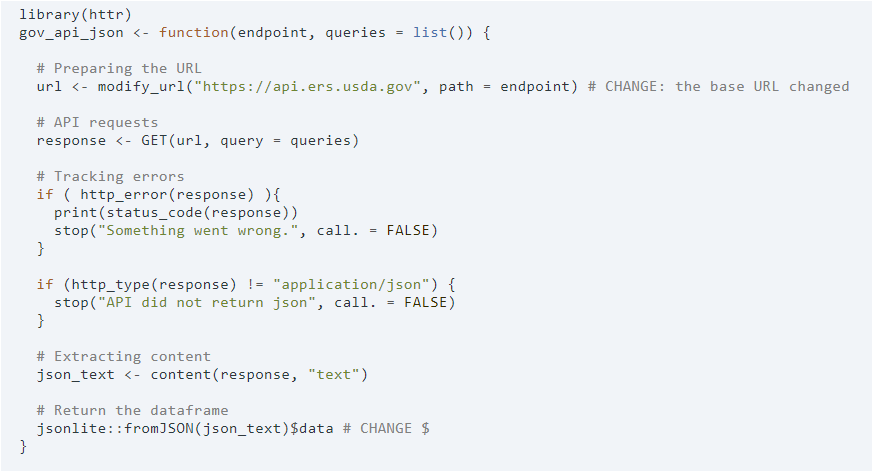

Let's use this function to extract the agriculture dataset categories from the Data Gov API. We have to generate our [API key](https://api.data.gov/signup/) that we will use to solve this exercise.

**Task**

1. Use this [link](https://api.data.gov/signup/) to generate an API key for Data Gov API.

    * We recommend to generate a key for ourself:
        * It will give us experience with how to do it.
        * We can also use it for our personal projects.
    * If we prefer not to, we may simulate doing this by entering `api_key = our_key` for the next few exercises.
2. Use the `gov_api_json()` function to output the Data Gov API response for the **agriculture dataset categories** in dataframe: `"data/arms/category"`.

    * Set the `api_key` query parameter to our API key.
    * Save the output as `agriculture_categories`.
    
**Answer**

`agriculture_categories <- gov_api_json("data/arms/category", queries = list(api_key = our_key))`

So far, we've been making GET requests. We use GET requests to retrieve information from a server (hence the name GET). However, there are a few other types of API requests.

We use POST requests to send information (instead of retrieving it) and create objects on the API's server. For instance, with the [Reddit API](https://www.reddit.com/dev/api/#section_messages), we can use POST requests to create or update new messages or comments.

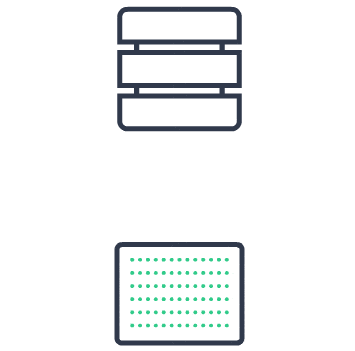

In [5]:
Image("post_content.gif")

Different API endpoints choose what types of requests they will accept. Not all endpoints will accept a POST request, and not all will accept a GET request. We'll have to consult the API's documentation to figure out which endpoints accept which types of requests.

We'll use [httpbin](http://httpbin.org/), which accepts many HTTP request types. `httpbin` is interesting for us because it returns the request's content if the operation succeeds. This allows testing many request types quickly.

We can make POST requests using the `POST()` function. POST requests almost always include data because we need to send information to the server to create or extract an object.

We pass in the data with the `body` parameter like we do with query parameters and GET requests:

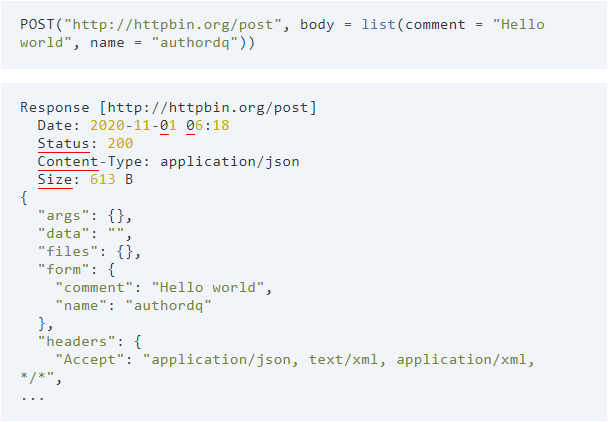

The API response shows that our request was a success (`status = 200`), and the server returns the content we've sent. We can see it under the `"form"` key.

Typically, we use the `http_error()` function from `httr` package we saw in the last file to check if the request succeeded.

We won't be working with POST Requests extensively, but we think it's important to be aware of this concept. Usually, data professionals extract data from APIs and barely send information.

Let's use the `POST()` function to send another message to `httpbin`.

**Task**

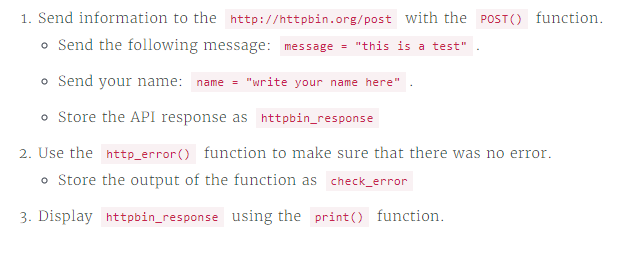

**Answer**

`httpbin_response  <-  POST("http://httpbin.org/post", body = list(message = "this is a test", name = "authordq"))`

`check_error  <-  http_error(httpbin_response)`

`print(httpbin_response)`

In this file, we expanded our knowledge of working with APIs.

* Adding parameters to our HTTP requests.
* Extracting data from other pages with pagination.
* Using API keys to authenticate and extract data on secure APIs.
* Trying the POST request as another type of HTTP request.

For our next step, we can try other HTTP request types, like the following:

* `DELETE` request, which removes objects from the server.
* `PUT` request, which will send the object we're revising as a replacement for the server's existing version.